 # Cvičení 10. Dvou-výběrové testy/Intervalové odhady
 ## Michal Béreš, Martina Litschmannová
 ---


# 1. Párová vs. dvouvýběrová data
- Párová data označují data, která jsou vstažena k dvěma měřením stejných entit -> datové sloupce jsou závislé. 
- Pokud jsou nezávislé, jedná se o dvouvýběrový test. 
- Pro párová data napočítáme rozdíl mezi sloupci (případně jinou funkci dle zadání) a použijeme jednovýběrové testy na tento rozdíl.

### Příklady párových dat:
- měření žárovek při dvou různých teplotách (pokud každý kus je měřen dvakrát - při teplotě 1 a teplotě 2)
    - zde pozor, může se stát, že jsou testy např. destruktivní a nelze měřit dvakrát stejnou entitu (výrobek). Potom bychom uvažovali dva nezávislé výběry, každý pro jeden typ měření -> nezávislé datové sloupce -> dvouvýběrové testy
- měření hodnot v krvi pacienta před a po podání léčiva
    - opět pozor na například testování léků ve dvou skupinách (placebo/skutečný lék) -> dvě nezávislé skupiny -> dvouvýběrové testy

### Obecně k dvouvýběrovým testům/IO
- test je vždy svázán s příslušným IO -> stejné podmínky pro použití
- pokud má test podmínky použití (např.: normalita dat, symetrie dat) pak musí tuto podmínku splnit **oba soubory**, pokud alespoň jeden nesplňuje, považujeme předpoklad za porušený
- jeden z velmi důležitých předpokladů je nezávislost dat
    - např.: měření výrobků výrobce A a výrobků výrobce B - zde je rozumné předpokládat, že výrobky výrobce A jsou samostatné entity od výrobků výrobce B

---

# 2. Přehled testů/konstrukcí IO

## I. Dvouvýběrové testy/IO - rozdíl měr polohy

In [ ]:
# vyrobíme si testovací data - tak je lze použít všude
data1 <- rnorm(n = 30, mean = 105, sd = 10)
data2 <- rnorm(n = 30, mean = 100, sd = 10)
boxplot(data1, data2)


### a) Dvouvýběrový Studentův t-test
- Testuje/odhaduje rozdíl středních hodnot: $H_0: \mu_{1} - \mu_{2} = a$
- požadavky:
    - Normalita dat
    - Homoskedasticita (shoda rozptlyů)
    - nezávislost výběrů
- funkce musí mít parametr var.equal = TRUE

In [ ]:
# H0: mu1 - mu2 = 2
# HA: mu1 - mu2 != 2

t.test(
       x = data1, y = data2, mu = 2, alternative = "two.sided",
       var.equal = TRUE, conf.level = 0.95
)


In [ ]:
# H0: mu1 - mu2 = 2
# HA: mu1 - mu2 > 2

t.test(
       x = data1, y = data2, mu = 2, alternative = "greater",
       var.equal = TRUE, conf.level = 0.95
)


In [ ]:
# H0: mu1 - mu2 = 2
# HA: mu1 - mu2 < 2

t.test(
       x = data1, y = data2, mu = 2, alternative = "less",
       var.equal = TRUE, conf.level = 0.95
)


### b) Aspinové-Welshův test
- Testuje/odhaduje rozdíl středních hodnot: $H_0: \mu_{1} - \mu_{2} = a$
- požadavky:
    - Normalita dat
    - nezávislost výběrů
- funkce musí mít parametr var.equal = FALSE

In [ ]:
# H0: mu1 - mu2 = 2
# HA: mu1 - mu2 != 2

t.test(
       x = data1, y = data2, mu = 2, alternative = "two.sided",
       var.equal = FALSE, conf.level = 0.95
)


In [ ]:
# H0: mu1 - mu2 = 2
# HA: mu1 - mu2 > 2

t.test(
       x = data1, y = data2, mu = 0, alternative = "greater",
       var.equal = FALSE, conf.level = 0.95
)


In [ ]:
# H0: mu1 - mu2 = 2
# HA: mu1 - mu2 < 2

t.test(
       x = data1, y = data2, mu = 0, alternative = "less",
       var.equal = FALSE, conf.level = 0.95
)


### c) Mannův-Whitneyův test
- Testuje/odhaduje rozdíl mediánů: $H_0: X_{0.5,1} - X_{0.5,2} = a$
- požadavky:
    - nezávislost výběrů
    - (stejný typ rozdělení)
- vyžaduje conf.int = TRUE, pro spočtení IO

In [ ]:
# H0: X0.5,1 - X0.5,2 = 2
# HA: X0.5,1 - X0.5,2 != 2

wilcox.test(
    x = data1, y = data2, mu = 2, alternative = "two.sided",
    conf.level = 0.95, conf.int = TRUE
)


In [ ]:
# H0: X0.5,1 - X0.5,2 = 2
# HA: X0.5,1 - X0.5,2 > 2

wilcox.test(
    x = data1, y = data2, mu = 2, alternative = "greater",
    conf.level = 0.95, conf.int = TRUE
)


In [ ]:
# H0: X0.5,1 - X0.5,2 = 2
# HA: X0.5,1 - X0.5,2 < 2

wilcox.test(
    x = data1, y = data2, mu = 2, alternative = "less",
    conf.level = 0.95, conf.int = TRUE
)


## II. Dvouvýběrové testy/IO - podíl rozptylů
### a) F-test
- Testuje/odhaduje podíl rozptylů: $H_0: \sigma^2_{1} / \sigma^2_{2} = a$
- požadavky:
    - normalita dat
    - nezávislost výběrů

In [ ]:
# H0: sigma1^2/sigma2^2 = 1
# H0: sigma1^2/sigma2^2 != 1

var.test(
    x = data1, y = data2, ratio = 1, alternative = "two.sided",
    conf.level = 0.95
)


In [ ]:
# H0: sigma1^2/sigma2^2 = 1
# H0: sigma1^2/sigma2^2 > 1

var.test(
    x = data1, y = data2, ratio = 1, alternative = "greater",
    conf.level = 0.95
)


In [ ]:
# H0: sigma1^2/sigma2^2 = 1
# H0: sigma1^2/sigma2^2 < 1

var.test(
    x = data1, y = data2, ratio = 1, alternative = "less",
    conf.level = 0.95
)


### b) Leveneův test
- Testuje rovnost rozptylů: $H_0: \sigma^2_{1} = \sigma^2_{2}$ !
- požadavky:
    - nezávislost výběrů
- vyžaduje data ve standardním datovém formátu
- funkce leveneTest v balíčku car

In [ ]:
# vyrobíme data ve standardním datovém formátu

data1.df <- as.data.frame(data1)
data1.df$typ <- "d1"
colnames(data1.df) <- c("data", "typ")

data2.df <- as.data.frame(data2)
data2.df$typ <- "d2"
colnames(data2.df) <- c("data", "typ")

data <- rbind(data1.df, data2.df)
data$typ <- as.factor(data$typ)

head(data)


In [ ]:
# install.packages("car")

# H0: sigma1^2 = sigma2^2
# HA: sigma1^2 != sigma2^2

car::leveneTest(data$data ~ data$typ)


## III. Dvouvýběrové testy/IO - rozdíl pravděpodobností
### Test homogenity dvou binomických rozdělení
- Testuje shodu/odhaduje rozdíl pravděpodobností: $H_0: \pi_{1} - \pi_{2} = 0$
- požadavky:
    - dostatečná velikost výběrů: $n_i>\frac{9}{p_i(1-p_i)}$
    - nezávislost výběrů

In [ ]:
# vyrobíme si vhodná data
pi1 <- 0.4
pi2 <- 0.3

dp1 <- runif(n = 100, min = 0, max = 1) < pi1
dp2 <- runif(n = 130, min = 0, max = 1) < pi2

x1 <- sum(dp1)
n1 <- length(dp1)

x2 <- sum(dp2)
n2 <- length(dp2)

x1
n1
x2
n2


In [ ]:
# H0: pi1 - pi2 = 0
# HA: pi1 - pi2 != 0

prop.test(
    x = c(x1, x2), n = c(n1, n2), alternative = "two.sided",
    conf.level = 0.95
)


In [ ]:
# H0: pi1 - pi2 = 0
# HA: pi1 - pi2 > 0

prop.test(
    x = c(x1, x2), n = c(n1, n2), alternative = "greater",
    conf.level = 0.95
)


In [ ]:
# H0: pi1 - pi2 = 0
# HA: pi1 - pi2 < 0

prop.test(
    x = c(x1, x2), n = c(n1, n2), alternative = "less",
    conf.level = 0.95
)


---

# Příklady
## Příkald 1.
Data v souboru `data/testy_dvouvyberove.xlsx` v listu `cholesterol2` udávají hladinu cholesterolu v krvi mužů dvou různých věkových skupin (20-30 letých a 40-50 letých). Ověřte na hladině významnosti 0,05 hypotézu, zda se hladina cholesterolu v krvi starších mužů neliší od hladiny cholesterolu v krvi mladších mužů.

In [1]:
# Načtení dat
chol <- readxl::read_excel("data/testy_dvouvyberove.xlsx",
    sheet = "cholesterol2",
    skip = 1
)
colnames(chol) <- c("mladsi", "starsi")
head(chol)


mladsi,starsi
<dbl>,<dbl>
4.573,4.593
4.565,4.589
4.624,4.864
4.720,4.603
4.604,5.090
4.662,5.472


In [2]:
# Převod do standardního datového formátu
chol.s <- stack(chol)
chol.s <- na.omit(chol.s)
colnames(chol.s) <- c("hodnoty", "skupina")
head(chol.s)


,hodnoty,skupina
,<dbl>,<fct>
1,4.573,mladsi
2,4.565,mladsi
3,4.624,mladsi
4,4.720,mladsi
5,4.604,mladsi
6,4.662,mladsi


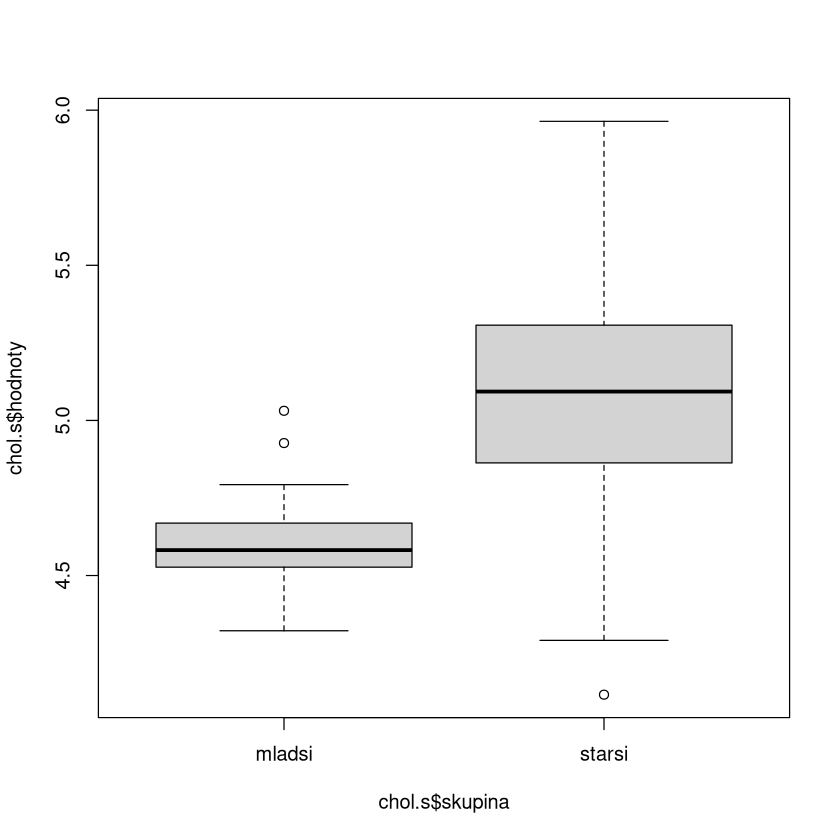

In [3]:
# Explorační analýza - zhodnocení OP
boxplot(chol.s$hodnoty ~ chol.s$skupina)


In [ ]:
# Odstranění odlehlých pozorování:
chol.s$hodnoty.bez <- chol.s$hodnoty

pom <- boxplot(chol.s$hodnoty[chol.s$skupina == "mladsi"], plot = FALSE)
chol.s$hodnoty.bez[chol.s$skupina == "mladsi" &
    chol.s$hodnoty %in% pom$out] <- NA

pom <- boxplot(chol.s$hodnoty[chol.s$skupina == "starsi"], plot = FALSE)
chol.s$hodnoty.bez[chol.s$skupina == "starsi" &
    chol.s$hodnoty %in% pom$out] <- NA

boxplot(chol.s$hodnoty.bez ~ chol.s$skupina)

# pozor v datech máme NA a musíme s tím dále počítat!!!
# (např. u zjištění délky)


In [ ]:
library(dplyr)

chol.s %>%
    group_by(skupina) %>%
    summarise(
        pocet = sum(!is.na(hodnoty.bez)),
        prumer = mean(hodnoty.bez, na.rm = TRUE),
        smer.odch = sd(hodnoty.bez, na.rm = TRUE)
    )

# zaokrouhlování -> 3 platné cifry -> dle sd na tisíciny


**Test o shodě středních hodnot / mediánů**

In [ ]:
# Ověření normality
chol.s %>%
    group_by(skupina) %>%
    summarise(norm.pval = shapiro.test(hodnoty.bez)$p.value)

# normalita na hl. významnosti 0.05 OK


In [ ]:
# Ověření shody rozptylů

# Exploračně
rozptyly <- chol.s %>%
    group_by(skupina) %>%
    summarise(rozptyl = sd(hodnoty.bez, na.rm = TRUE)^2)
rozptyly
max(rozptyly$rozptyl) / min(rozptyly$rozptyl)

# explorační posouzení: poměr nejvetšího ku nejmenšímu je > než 2
# -> nepředpokládám shodu rozptylu


In [ ]:
# Exaktně pomocí F-testu

# H0: sigma.starsi = sigma.mladsi
# Ha: sigma.starsi <> sigma.mladsi

# vyberu si žádaná data
starsi.bez <- chol.s$hodnoty.bez[chol.s$skupina == "starsi"]
mladsi.bez <- chol.s$hodnoty.bez[chol.s$skupina == "mladsi"]

var.test(x = starsi.bez, y = mladsi.bez, ratio = 1, conf.level = 0.95)

# Na hl. významnosti 0.05 zamítáme předpoklad o shodě rozptylů
# Pozorovanou neshodu mezi rozptyly lze na hladině významnosti 0,05
# označit za statisticky významnou.


In [ ]:
# Ověření shody středních hodnot (Aspinové-Welchův test)

# H0: mu.starsi - mu.mladsi = 0
# Ha: mu.starsi - mu.mladsi != 0

t.test(
       x = starsi.bez, y = mladsi.bez, mu = 0,
       alternative = "two.sided", var.equal = FALSE, conf.level = 0.95
)

# na hl. významnosti 0.05 zamítáme H0-> existuje stat. významný rozdíl.


In [ ]:
# H0: mu.starsi = mu.mladsi (mu.starsi - mu.mladsi = 0)
# Ha: mu.starsi > mu.mladsi (mu.starsi - mu.mladsi > 0)

t.test(
       x = starsi.bez, y = mladsi.bez, mu = 0, alternative = "greater",
       var.equal = FALSE, conf.level = 0.95
)

# Na hladině významnosti 0,05 zamítáme předpoklad o shodě středních
# hodnot cholesterolu ve skupinách mladších a starších mužů ve prospěch
# alternativy, že starší muži mají vyšší střední hladinu cholesterolu
# než muži mladší
# Dle výsledků výběrového šetření očekáváme, že střední obsah
# cholesterolu v krvi straších mužů bude cca o 0,524 mmol/l vyšší než
# střední obsah chol. u mladších mužů. Dle 95% levostranný interv.
# odhadu daného rozdílu očekáváme střední obsah cholesterolu u
# starších mužů minimálně o 0,457 mmol/l větší než stř. hodnota
# cholesterolu u mladších mužů.


## Příklad 2.
Údaje v souboru deprese.xls představují délku remise ve dnech z prostého náhodného výběru ze dvou různých skupin pacientů (pacienti s endogenní depresi a pacienti s neurotickou depresí). Ověřte, zda je pozorovaný rozdíl mezi průměrnou délkou remise u těchto dvou skupin pacientů statisticky významný.

In [ ]:
# Načtení dat z xlsx souboru (pomoci balíčku readxl)
deprese <- readxl::read_excel("data/testy_dvouvyberove.xlsx",
    sheet = "deprese"
)
colnames(deprese) <- c("endo", "neuro")

head(deprese)


In [ ]:
# Převod do standardního datového formátu
deprese.s <- stack(deprese)
deprese.s <- na.omit(deprese.s)
colnames(deprese.s) <- c("hodnoty", "skupina")

head(deprese.s)


In [ ]:
# Explorační analýza
boxplot(deprese.s$hodnoty ~ deprese.s$skupina)

# Data neobsahují odlehlá pozorování.


In [ ]:
library(dplyr)

deprese.s %>%
    group_by(skupina) %>%
    summarise(
        pocet = length(hodnoty),
        prumer = mean(hodnoty),
        smer.odch = sd(hodnoty)
    )

# zaokrouhlování -> 3 platné cifry -> dle sd na jednotky


**Test o shodě středních hodnot / mediánů**

In [ ]:
# Ověření normality
# Předpoklad normality ověříme Shapirovovým - Wilkovovým testem.
deprese.s %>%
    group_by(skupina) %>%
    summarise(norm.pval = shapiro.test(hodnoty)$p.value)


# Na hl. významnosti 0,05 zamítáme předpoklad normality


In [ ]:
# alespoň orientačne zkontrolujeme podobnost rozdělení

# vybereme si data pro jednodušší spracování

neuro <- deprese.s$hodnoty[deprese.s$skupina == "neuro"]
endo <- deprese.s$hodnoty[deprese.s$skupina == "endo"]


par(mfrow = c(1, 2))
hist(neuro)
hist(endo)


In [ ]:
# Ověření shody mediánů (Mannův - Whitneyho test)

# Dle histogramů předpokládáme, že data mají stejný typ rozdělení.

# H0: med.neuro = med.endo (med.neuro - med.endo = 0)
# Ha: med.neuro != med.endo (med.neuro - med.endo != 0)

wilcox.test(
    x = neuro, y = endo, mu = 0, alternative = "two.sided",
    conf.level = 0.95, conf.int = TRUE
)

# na hl. významnosti 0.05 zamítáme H0-> existuje stat. významný rozdíl


In [ ]:
# H0: med.neuro = med.endo (med.neuro - med.endo = 0)
# Ha: med.neuro > med.endo (med.neuro - med.endo > 0)

wilcox.test(
    x = neuro, y = endo, mu = 0, alternative = "greater",
    conf.level = 0.95, conf.int = TRUE
)

# Na hladině významnosti 0,05 zamítáme hyp. o shodě mediánů dob do
# remise onemocnění pro obě skupiny pacientů ve prospěch alternativy

# Medián doby remise je u pacientů s neurotickou depresí statisticky
# významně větší než u pacientů s endogenní depresí.

# Doba remise pacientů s neurotickou depresí je cca o 191 dnů delší
# než u pacientů s endogenní depresí. Dle 95% levostranného
# intervalového odhadu očekáváme, že pacienti s neuro. depresí mají
# minimálně o 168 dní delší dobu remise než pacienti s endo. depresí.


## Příklad 3.
Sledujeme osmolalitu moči na lůžkové stanici v 08:00 hodin a v 11:00 hodin u 16 mužů. Na základě výsledků uvedených v souboru osmolalita.xls ověřte, zda se osmolalita statisticky významně zvýšila.

In [ ]:
# Načtení dat
osmolalita <- readxl::read_excel("data/testy_dvouvyberove.xlsx",
    sheet = "osmolalita", skip = 1
)
osmolalita <- osmolalita[, c(2, 3)]
colnames(osmolalita) <- c("o8", "o11")
head(osmolalita)


In [ ]:
# Výpočet nárůstu osmolality
osmolalita$narust <- osmolalita$o11 - osmolalita$o8

# Explorační analýza
par(mfrow = c(1, 1))
boxplot(osmolalita$narust)

# Data obsahují odlehlá pozorování.


In [ ]:
# Odstranění odlehlých hodnot
pom <- boxplot(osmolalita$narust, plot = FALSE)

osmolalita$narust.bez <- osmolalita$narust
osmolalita$narust.bez[osmolalita$narust %in% pom$out] <- NA

boxplot(osmolalita$narust.bez)


In [ ]:
# Explorační analýza pro data bez odlehlých pozorování
library(dplyr)

osmolalita %>% summarise(
    pocet = sum(!is.na(narust.bez)),
    prumer = mean(narust.bez, na.rm = TRUE),
    smer.odch = sd(narust.bez, na.rm = TRUE)
)

# zaokrouhlování -> 2 platné cifry -> dle sd na jednotky


In [ ]:
# Ověření normality
# Předpoklad normality ověříme Shapirovým - Wilkovým testem.
shapiro.test(osmolalita$narust.bez)
# Na hl. významnosti 0.05 nelze předpoklad normality zamítnout
# (Shapirův-Wilkův test, W = 0,949, p-hodnota=0,545).


In [ ]:
# Párový t-test
# H0: mu.narust = 0 mm
# Ha: mu.narust > 0 mm

t.test(osmolalita$narust.bez, mu = 0, alternative = "greater")

# Dle výběrového šetření lze očekávat, že osmolalita moči se
# mezi 8 a 11 hodinou zvýší o cca 24 mmol/kg. Dle 95% intervalového odhadu
# lze očekávat, že dojde k navýšení osmolality minimálně o 10 mmol/kg).
# Na hladině významnosti 0,05 lze tento nárůst označit za statisticky
# významný (párový t-test, t = 3,1, df = 13, p-hodnota = 0,005).


## Příklad 4.
Byly testovány polovodičové součástky dvou výrobců - MM a PP. MM prohlašuje, že její výrobky mají nižší procento vadných kusů. Pro ověření tohoto tvrzení bylo z produkce MM náhodně vybráno 200 součástek, z nichž 14 bylo vadných. Podobný experiment byl proveden u firmy PP s výsledkem 10 vadných ze 100 náhodně vybraných součástek.
### a) 
Otestujte tvrzení firmy MM čistým testem významnosti.

In [ ]:
x.MM <- 14
n.MM <- 200
p.MM <- x.MM / n.MM
p.MM

x.PP <- 10
n.PP <- 100
p.PP <- x.PP / n.PP
p.PP


In [ ]:
# Ověření předpokladů
9 / (p.MM * (1 - p.MM))
9 / (p.PP * (1 - p.PP))


Dále pro obě firmy předpokládáme, že  n/N < 0.05, tj. že daná populace (součástek) má rozsah 
alespoň 20 * n, tj. 20 * 200 (4 000), resp. 20 * 150 (3 000) součástek, což je asi vcelku reálný předpoklad.

In [ ]:
# Pearsonův X2 test
# H0: pi.PP = pi.MM
# Ha: pi.PP > pi.MM

prop.test(
    x = c(x.PP, x.MM), n = c(n.PP, n.MM), alternative = "greater",
    conf.level = 0.95
)

# Vzhledem k p-hodnotě > hl. významnosti 0.05 nezamítáme H0 - tedy předpokl.
# shodné chybovosti. Nelze tedy říci, že firma MM má kvalitnější produkci.


In [ ]:
# Pearsonův X2 test
# H0: pi.PP = pi.MM
# Ha: pi.PP != pi.MM

prop.test(
    x = c(x.PP, x.MM), n = c(n.PP, n.MM), alternative = "two.sided",
    conf.level = 0.95
)


### b) 
Otestujte tvrzení firmy MM prostřednictvím intervalového odhadu na hladině významnosti 0,05.

In [ ]:
# Na základě 95% Clopperova - Pearsonova pravostranného intervalového odhadu
# (-0,036; 1,000) lze pozorovaný rozdíl v kvalitě výroby označit za
# statisticky nevýznamný. Ke stejným závěrům můžeme dojít i na základě
# Pearsonova pravostranného testu
